In [ ]:
!pip install transformers

In [ ]:
!pip install seaborn

In [ ]:
!pip uninstall -y matplotlib
!pip install matplotlib==3.7.3

In [1]:
import tensorflow as tf
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import DistilBertConfig
from tensorflow.keras.utils import plot_model

model = tf.keras.models.load_model('/mnt/c/Users/hisay/Downloads/tensorflow_small')

# Check its architecture
model.summary()

2024-01-25 08:34:08.242487: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-25 08:34:09.429265: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-01-25 08:34:09.429350: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-01-25 08:34:09.433367: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-01-25 08:34:09.725643: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 2 compatible adapters.
2024-01-25 08:34:10.997516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the fo

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 64)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 64)]         0           []                               
                                                                                                  
 distilbert (TFDistilBertMainLa  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 yer)                           ast_hidden_state=(N               'input_mask[0][0]']             
                                one, 64, 768),                                                    
                                 hidden_states=None                                           

In [2]:
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [3]:
config = DistilBertConfig.from_pretrained(
    "distilbert-base-uncased",
)

In [4]:
transformer_model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", config=config)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [5]:
transformer_model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_38 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


In [6]:
plot_model(transformer_model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [7]:
max_seq_length = 64

CLASSES = [1, 2, 3, 4, 5]

config = DistilBertConfig.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(CLASSES),
    id2label={0: 1, 1: 2, 2: 3, 3: 4, 4: 5},
    label2id={1: 0, 2: 1, 3: 2, 4: 3, 5: 4},
)
print(config)

DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": 1,
    "1": 2,
    "2": 3,
    "3": 4,
    "4": 5
  },
  "initializer_range": 0.02,
  "label2id": {
    "1": 0,
    "2": 1,
    "3": 2,
    "4": 3,
    "5": 4
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.37.0",
  "vocab_size": 30522
}



In [25]:
import pandas as pd
import numpy as np

from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def predict(text):
    d = '/device:GPU:0' # Nvidia Quadro P1000
#    d = '/device:GPU:1' # Intel HD620
#    d = '/device:CPU:0' # Intel CPU itself
    with tf.device(d):
        encode_plus_tokens = tokenizer.encode_plus(
                             text,
                             pad_to_max_length=True,
                             max_length=max_seq_length,
                             truncation=True,
                             return_tensors='tf')
    
        input_ids = encode_plus_tokens['input_ids']
        input_mask = encode_plus_tokens['attention_mask']
    
        outputs = model.predict(x=(input_ids,input_mask))
    
        prediction = [{"label":config.id2label[item.argmax()], \
                       "socre":item.max().item()} for item in outputs]

        return prediction[0]

In [26]:
predict("This is great!")

1/1 [==============================] - 0s 323ms/step


{'label': 5, 'socre': 0.8040823936462402}

In [10]:
df = pd.read_parquet("/mnt/c/Users/hisay/Downloads/amazon_reviews_2015_small_tail.snappy.parquet",columns=["star_rating","review_id","review_body"])

In [11]:
numOfSample=200
for i in range(1,6):
    new_df = 'df' + str(i)
    globals()[new_df] = df[df['star_rating'] == i].sample(n=numOfSample)

In [12]:
test_df = pd.concat([df1,df2,df3,df4,df5])

In [13]:
test_df.count()

star_rating    1000
review_id      1000
review_body    1000
dtype: int64

In [14]:
test_df

,star_rating,review_id,review_body
83366,1,R7ZFMV8MZ42J6,Does your cat love iced tea? These are the per...
424772,1,R21H6LJRXMP02F,"Not only did the dress come above my feet, res..."
457566,1,R3L22RBAMTJ7DY,I can't put into words what a mess this was. T...
210633,1,R23VKZI3ACMQGF,This trumpet has been a nightmare. The valves ...
272504,1,RXGC1KAWSG6NJ,Can I give zero stars. no kidding I have kille...
...,...,...,...
407492,5,RRI0UFTVF57DX,These glasses are as pictured and worked on my...
112271,5,R1DN8USTZAVETH,They write so smoothly. My 5 year old daughter...
240838,5,RJSA4TD6IR12J,"This is the best shampoo I've used, by a long ..."
370921,5,R2JYYQFPW2XLYD,works great


In [27]:
y_test = test_df['review_body'].map(predict)
y_true = test_df['star_rating']

1/1 [==============================] - 0s 189ms/step


In [28]:
print(type(y_true))
y_true2 = [x for x in y_true.values]

<class 'pandas.core.series.Series'>


In [29]:
print(type(y_true2))
print(y_true2)

<class 'list'>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [30]:
print(type(y_test))
y_test2 = [x.get('label') for x in y_test.values]

<class 'pandas.core.series.Series'>


In [31]:
print(type(y_test2))
print(y_test2)

<class 'list'>
[4, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 4, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 4, 2, 1, 2, 1, 1, 3, 2, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 2, 2, 3, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 4, 2, 1, 1, 2, 1, 2, 2, 1, 3, 3, 2, 1, 3, 3, 1, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 1, 2, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 1, 3, 3, 4, 2, 4, 3, 5, 2, 2, 1, 2, 2, 4, 2, 2, 4, 1, 1, 1, 4, 1, 1, 3, 1, 3, 1, 3, 2, 3, 3, 3, 2, 2, 3, 2, 1, 1, 2, 2, 2, 3, 1, 2, 3, 3, 5, 4, 2, 4, 2, 3, 1, 1, 1, 3, 1, 3, 2, 1, 2, 2, 1, 3, 3, 1, 2, 1, 2, 5, 2, 3, 1, 2, 4, 1, 4, 2, 1, 3, 5, 3, 2, 2, 1, 1, 3, 1, 

In [32]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#print(CLASSES)
cm = confusion_matrix(y_true2, y_test2, labels=CLASSES)
cm_df = pd.DataFrame(cm, index=CLASSES, columns=CLASSES)
cm_df

,1,2,3,4,5
1,141,35,15,6,3
2,73,63,48,12,4
3,38,37,72,37,16
4,10,17,46,75,52
5,13,3,8,41,135


In [33]:
arrayX = []
for array in cm:
    temp = []
    # print(array)
    # sumOfValue = array.sum()
    for i in range(len(array)):
        # print(array[i])
        # temp.append(array[i]/sumOfValue)
        temp.append(array[i]/numOfSample)
    arrayX.append(temp)

# print(arrayX)
arrayX_df = pd.DataFrame(arrayX, index=CLASSES, columns=CLASSES)
arrayX_df

,1,2,3,4,5
1,0.705,0.175,0.075,0.030,0.015
2,0.365,0.315,0.240,0.060,0.020
3,0.190,0.185,0.360,0.185,0.080
4,0.050,0.085,0.230,0.375,0.260
5,0.065,0.015,0.040,0.205,0.675


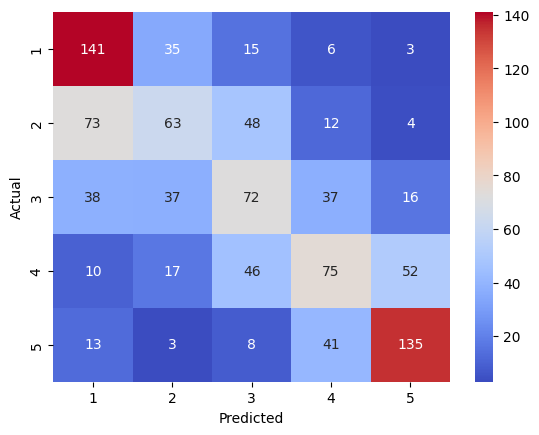

In [34]:
sns.heatmap(cm_df, annot=True, annot_kws={"fontsize":10}, cmap='coolwarm', fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

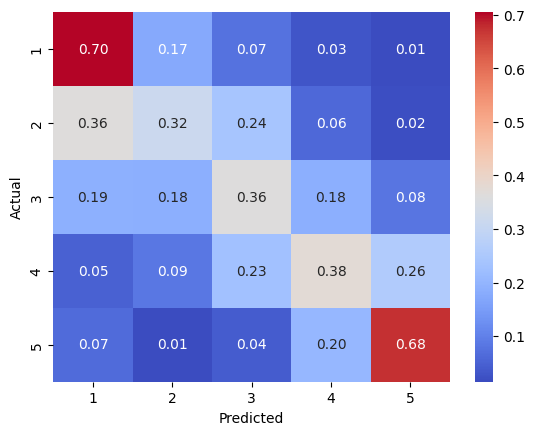

In [35]:
sns.heatmap(arrayX_df, annot=True, annot_kws={"fontsize":10}, cmap='coolwarm', fmt='.2f', xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>